# Summary Statistics of Top 100 Most Streamed Songs on Spotify

An exploration of the correlation between tempo and energy of song


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import HTML, Audio
import random
from scipy import stats

In [42]:
## Data Retrieval and Preprocessing

# Authentication
client_credentials_manager = SpotifyClientCredentials(client_id='dac2a169157447f6be0997311fc87b8b', client_secret='6f3fc22ffbd24fe19b709bf0c9a82af1')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Fetch playlist data
playlist_id = '5ABHKGoOzxkaa28ttQV9sE'
results = sp.playlist_tracks(playlist_id)
tracks = results['items']

# Extract relevant information
track_data = []
for track in tracks:
    track_info = track['track']
    audio_features = sp.audio_features(track_info['id'])
    
    if audio_features and audio_features[0]:
        audio_features = audio_features[0]
        track_data.append({
            'id': track_info['id'],
            'name': track_info['name'],
            'artist': track_info['artists'][0]['name'],
            'tempo': audio_features.get('tempo', None),
            'energy': audio_features.get('energy', None),
            'preview_url': track_info['preview_url']
        })
    else:
        print(f"Warning: No audio features available for track '{track_info['name']}'")

df = pd.DataFrame(track_data)

In [43]:
print(f"Successfully processed {len(df)} out of {len(tracks)} tracks")

Successfully processed 99 out of 100 tracks


In [44]:
## Data Exploration

print(df.head())
print(df.describe())

                       id                                           name  \
0  0VjIjW4GlUZAMYd2vXMi3b                                Blinding Lights   
1  7qiZfU4dY1lWllzX7mPBI3                                   Shape of You   
2  7qEHsqek33rTcFNT9PFqLf                              Someone You Loved   
3  4Dvkj6JhhA12EX05fT7y2e                                      As It Was   
4  3KkXRkHbMCARz0aVfEt68P  Sunflower - Spider-Man: Into the Spider-Verse   

          artist    tempo  energy  \
0     The Weeknd  171.001   0.730   
1     Ed Sheeran   95.977   0.652   
2  Lewis Capaldi  109.891   0.405   
3   Harry Styles  173.930   0.731   
4    Post Malone   89.908   0.478   

                                         preview_url  
0                                               None  
1  https://p.scdn.co/mp3-preview/7339548839a263fd...  
2                                               None  
3  https://p.scdn.co/mp3-preview/c43dd07043b29e80...  
4                                            

In [45]:
## Central Tendency and Variance

# Calculate measures of central tendency for tempo and energy
tempo_mean = df['tempo'].mean()
tempo_median = df['tempo'].median()
energy_mean = df['energy'].mean()
energy_median = df['energy'].median()

print(f"Tempo - Mean: {tempo_mean:.2f}, Median: {tempo_median:.2f}")
print(f"Energy - Mean: {energy_mean:.2f}, Median: {energy_median:.2f}")

# Calculate range and variance
tempo_range = df['tempo'].max() - df['tempo'].min()
tempo_variance = df['tempo'].var()
energy_range = df['energy'].max() - df['energy'].min()
energy_variance = df['energy'].var()

print(f"Tempo - Range: {tempo_range:.2f}, Variance: {tempo_variance:.2f}")
print(f"Energy - Range: {energy_range:.2f}, Variance: {energy_variance:.2f}")

Tempo - Mean: 121.33, Median: 119.93
Energy - Mean: 0.62, Median: 0.64
Tempo - Range: 132.36, Variance: 893.17
Energy - Range: 0.66, Variance: 0.03


In [46]:
## List Comprehensions

# Create lists of track names with tempo above mean and energy above median
high_tempo_tracks = [track for track in df['name'] if df[df['name'] == track]['tempo'].values[0] > tempo_mean]
high_energy_tracks = [track for track in df['name'] if df[df['name'] == track]['energy'].values[0] > energy_median]

print("High tempo tracks:", high_tempo_tracks[:5])
print("High energy tracks:", high_energy_tracks[:5])

High tempo tracks: ['Blinding Lights', 'As It Was', 'Starboy', 'STAY (with Justin Bieber)', 'Believer']
High energy tracks: ['Blinding Lights', 'Shape of You', 'As It Was', 'STAY (with Justin Bieber)', 'Believer']


In [47]:
## Grouping and Aggregation

# Group by artist and calculate mean tempo and energy
artist_stats = df.groupby('artist').agg({
    'tempo': 'mean',
    'energy': 'mean'
}).reset_index()

print(artist_stats.head())

            artist    tempo  energy
0  Alexandra Lenus  130.072  0.6760
1   Arctic Monkeys   76.279  0.4745
2    Ariana Grande  139.848  0.3170
3           Avicii  124.080  0.7830
4         BellAnty  168.222  0.5900


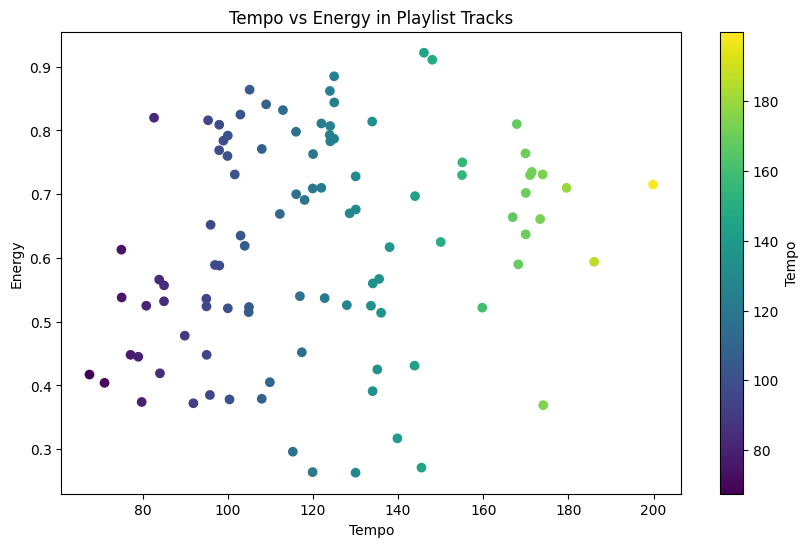

/var/folders/9c/fl5dfhzx5v719gyq_ckc2d8c0000gn/T/ipykernel_65655/1189408309.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/9c/fl5dfhzx5v719gyq_ckc2d8c0000gn/T/ipykernel_65655/1189408309.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


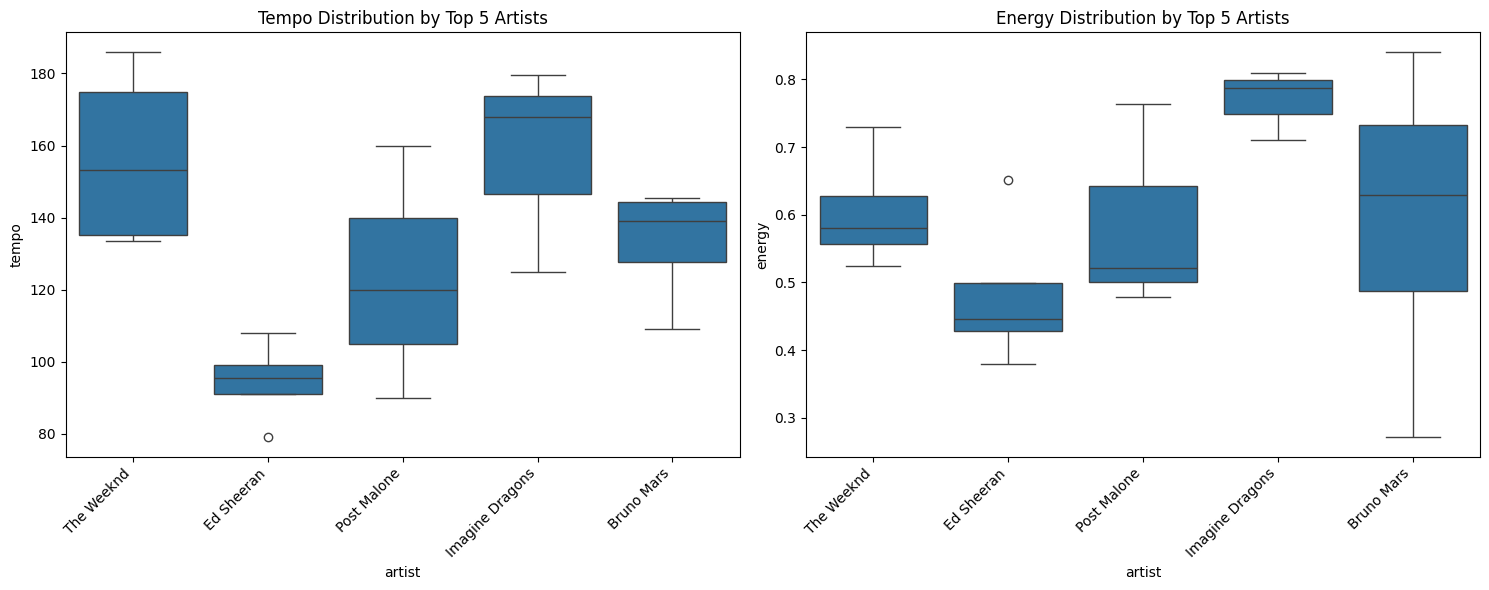

In [48]:
## Visualization

# Scatter plot of tempo vs energy with color map
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['tempo'], df['energy'], c=df['tempo'], cmap='viridis')
plt.colorbar(scatter, label='Tempo')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.title('Tempo vs Energy in Playlist Tracks')
plt.show()

# Box plot of tempo and energy by top 5 artists
top_5_artists = df['artist'].value_counts().nlargest(5).index
df_top_5 = df[df['artist'].isin(top_5_artists)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='artist', y='tempo', data=df_top_5, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title('Tempo Distribution by Top 5 Artists')

sns.boxplot(x='artist', y='energy', data=df_top_5, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title('Energy Distribution by Top 5 Artists')

plt.tight_layout()
plt.show()

In [49]:
## Music Player

def create_player(track):
    if track['preview_url']:
        return HTML(f"""
        <h3>{track['name']} by {track['artist']}</h3>
        <audio controls>
            <source src="{track['preview_url']}" type="audio/mpeg">
            Your browser does not support the audio element.
        </audio>
        """)
    else:
        return HTML(f"<p>No preview available for {track['name']} by {track['artist']}</p>")

# Display players for 3 random tracks
print("Random Track Samples:")
random_tracks = df.sample(3).to_dict('records')
for track in random_tracks:
    display(create_player(track))

def play_track_by_name(track_name):
    track = df[df['name'] == track_name].iloc[0]
    display(create_player(track))

# Example usage:
print("\nPlaying a specific track:")
play_track_by_name(df['name'].iloc[0])  # Play the first track in the dataset

Random Track Samples:



Playing a specific track:


In [50]:
## Additional Analysis

# Correlation between tempo and energy
correlation = df['tempo'].corr(df['energy'])
print(f"\nCorrelation between Tempo and Energy: {correlation:.2f}")

# Tracks with highest and lowest energy
highest_energy_track = df.loc[df['energy'].idxmax()]
lowest_energy_track = df.loc[df['energy'].idxmin()]

print("\nTrack with Highest Energy:")
print(f"{highest_energy_track['name']} by {highest_energy_track['artist']} (Energy: {highest_energy_track['energy']:.2f})")
display(create_player(highest_energy_track))

print("\nTrack with Lowest Energy:")
print(f"{lowest_energy_track['name']} by {lowest_energy_track['artist']} (Energy: {lowest_energy_track['energy']:.2f})")
display(create_player(lowest_energy_track))


Correlation between Tempo and Energy: 0.21

Track with Highest Energy:
Can't Hold Us (feat. Ray Dalton) by Macklemore & Ryan Lewis (Energy: 0.92)



Track with Lowest Energy:
EVEN NOW by MELINDA LINDNER (Energy: 0.26)


Correlation between Energy and Danceability: 0.17


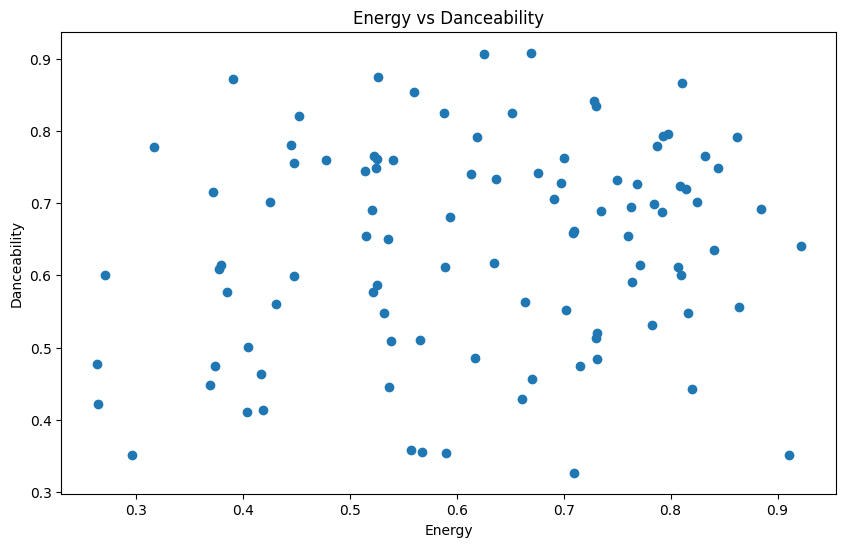

R-squared: 0.03
P-value: 0.0867
There is no significant relationship between energy and danceability.


In [53]:
## Hypothesis 1: Energy vs Danceability

# Fetch danceability data
for track in track_data:
    audio_features = sp.audio_features(track['id'])[0] 
    track['danceability'] = audio_features['danceability']

df['danceability'] = [track['danceability'] for track in track_data]

# Calculate correlation
energy_dance_corr = df['energy'].corr(df['danceability'])

print(f"Correlation between Energy and Danceability: {energy_dance_corr:.2f}")

# Visualize relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['energy'], df['danceability'])
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs Danceability')
plt.show()

# Linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['energy'], df['danceability'])

print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant relationship between energy and danceability.")
else:
    print("There is no significant relationship between energy and danceability.")

Correlation between Danceability and Popularity: 0.05


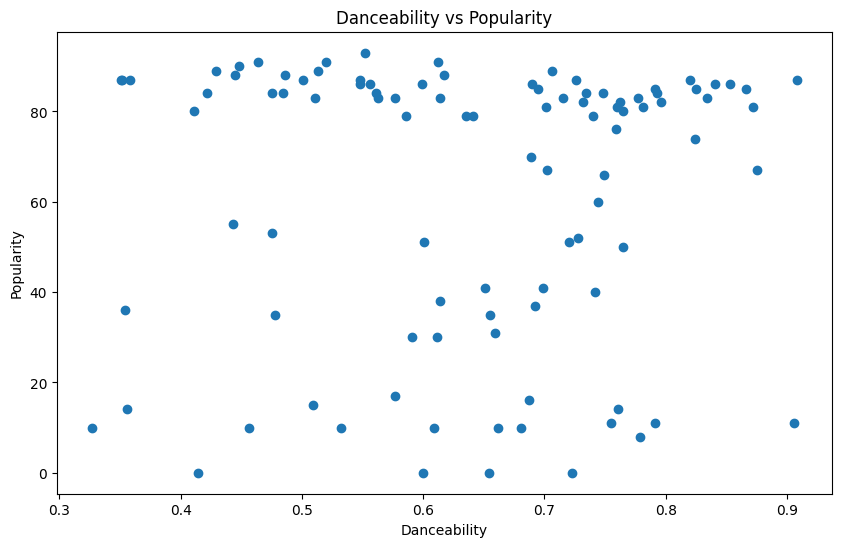

R-squared: 0.00
P-value: 0.6506
There is no significant relationship between danceability and popularity.


In [54]:
# Hypothesis 2: Danceability vs Streams (Popularity)

# Fetch stream data (Note: Spotify API doesn't provide stream counts, so we'll use popularity as a proxy)
for track in track_data:
    track_info = sp.track(track['id'])
    track['popularity'] = track_info['popularity']

df['popularity'] = [track['popularity'] for track in track_data]

# Calculate correlation
dance_pop_corr = df['danceability'].corr(df['popularity'])

print(f"Correlation between Danceability and Popularity: {dance_pop_corr:.2f}")

# Visualize relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['popularity'])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')
plt.show()

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['danceability'], df['popularity'])

print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant relationship between danceability and popularity.")
else:
    print("There is no significant relationship between danceability and popularity.")